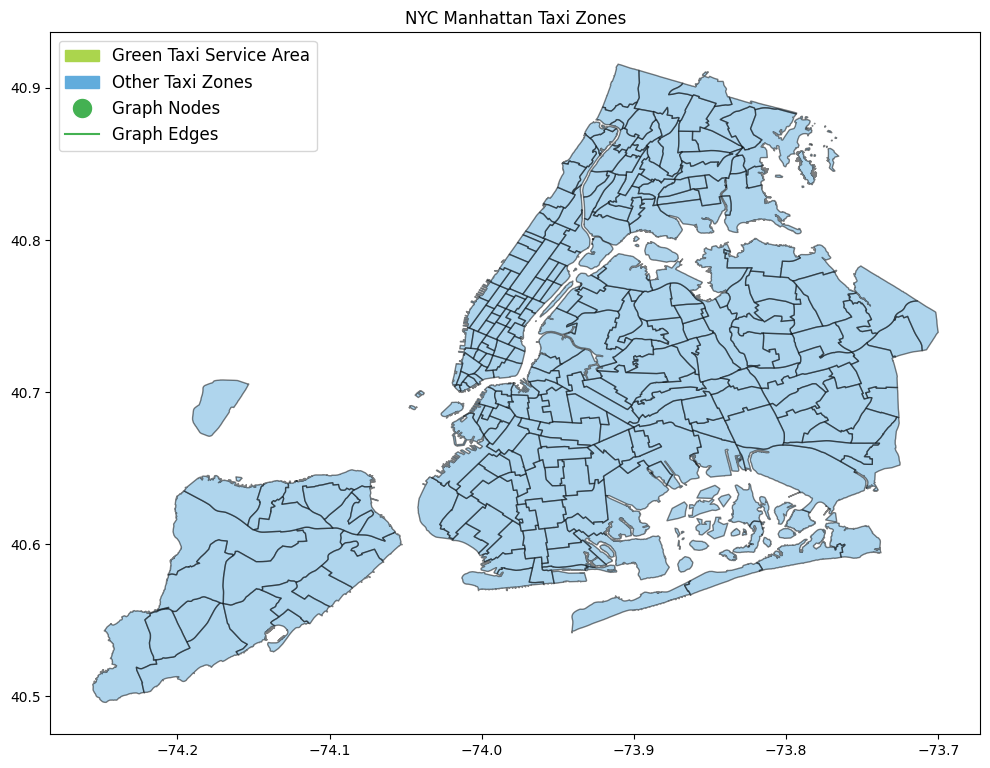

In [5]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from shapely.geometry import Point
from matplotlib.lines import Line2D

# Load the NYC taxi zones shapefile
taxi_zones_gdf = gpd.read_file('data/raw/taxi_zones/taxi_zones.shp')

# Filter to only include Manhattan zones
manhattan_taxi_zones_gdf = taxi_zones_gdf.to_crs(epsg=4326)

# Function to determine if a taxi zone contains any node
def zone_contains_node(zone, node_coordinates):
    return any(zone.geometry.contains(Point(coord)) for coord in node_coordinates.keys())

# Assign colors based on whether the zone contains a node
manhattan_taxi_zones_gdf['color'] = manhattan_taxi_zones_gdf.apply(
    lambda row:  '#61acdc', axis=1
)

# Create a figure
fig, ax = plt.subplots(figsize=(12, 12))

# Plot taxi zones with color based on node presence
manhattan_taxi_zones_gdf.plot(ax=ax, color=manhattan_taxi_zones_gdf['color'], edgecolor='black', alpha=0.5)


# Set aspect ratio to equal
ax.set_aspect('equal')

# Add title
plt.title("NYC Manhattan Taxi Zones")

# Create custom legend handles
# Create custom legend handles
legend_handles = [
    Patch(color='#abd54d', label='Green Taxi Service Area'),
    Patch(color='#61acdc', label='Other Taxi Zones'),
    Line2D([0], [0], marker='o', color='w', label='Graph Nodes', markerfacecolor='#44b152', markersize=15),
    Line2D([0], [0], color='#44b152', lw=1.5, label='Graph Edges')  # Line for edges
]

# Update legend
# Update legend
ax.legend(handles=legend_handles, loc='upper left', prop={'size': 12})  # Adjust font size

# plt.savefig("NYC_map.svg", format="svg")

plt.show()


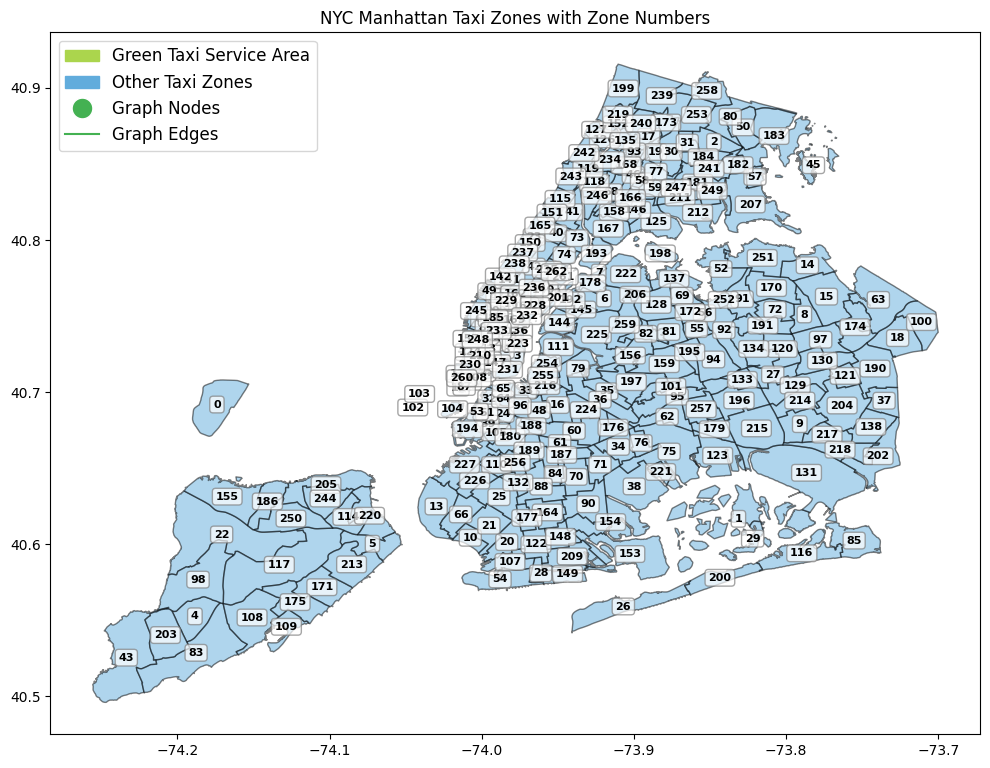

In [1]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from shapely.geometry import Point
from matplotlib.lines import Line2D

# Load the NYC taxi zones shapefile
taxi_zones_gdf = gpd.read_file('data/raw/taxi_zones/taxi_zones.shp')

# Filter to only include Manhattan zones
manhattan_taxi_zones_gdf = taxi_zones_gdf.to_crs(epsg=4326)

# Function to determine if a taxi zone contains any node
def zone_contains_node(zone, node_coordinates):
    return any(zone.geometry.contains(Point(coord)) for coord in node_coordinates.keys())

# Assign colors based on whether the zone contains a node
manhattan_taxi_zones_gdf['color'] = manhattan_taxi_zones_gdf.apply(
    lambda row:  '#61acdc', axis=1
)

# Create a figure
fig, ax = plt.subplots(figsize=(12, 12))

# Plot taxi zones with color based on node presence
manhattan_taxi_zones_gdf.plot(ax=ax, color=manhattan_taxi_zones_gdf['color'], edgecolor='black', alpha=0.5)

# 添加区域编号标注
for idx, row in manhattan_taxi_zones_gdf.iterrows():
    # 获取区域的几何中心点
    centroid = row.geometry.centroid
    
    # 添加编号文本
    # 使用 location_id 或 object_id 作为编号，根据你的数据选择合适的字段
    zone_id = row.get('location_id', idx)  # 如果数据中有 location_id 字段则使用，否则使用索引
    
    ax.text(
        centroid.x, centroid.y, 
        str(zone_id), 
        fontsize=8, 
        ha='center', 
        va='center',
        fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='gray', alpha=0.7)
    )

# Set aspect ratio to equal
ax.set_aspect('equal')

# Add title
plt.title("NYC Manhattan Taxi Zones with Zone Numbers")

# Create custom legend handles
legend_handles = [
    Patch(color='#abd54d', label='Green Taxi Service Area'),
    Patch(color='#61acdc', label='Other Taxi Zones'),
    Line2D([0], [0], marker='o', color='w', label='Graph Nodes', markerfacecolor='#44b152', markersize=15),
    Line2D([0], [0], color='#44b152', lw=1.5, label='Graph Edges')  # Line for edges
]

# Update legend
ax.legend(handles=legend_handles, loc='upper left', prop={'size': 12})  # Adjust font size

# plt.savefig("NYC_map.svg", format="svg")

plt.show()
